<a href="https://colab.research.google.com/github/jaworskamalgorzata99-GIT/Maching-Learning-Bootcamp/blob/main/unsupervised/dimensionality_reduction/04_pca_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from keras.datasets import mnist

###Wygenerowanie danych

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


Obcięcie obrazów do pierwszych 5000

In [4]:
X_train = X_train[:5000]
y_train = y_train[:5000]

Wizualizacja kilku obrazów

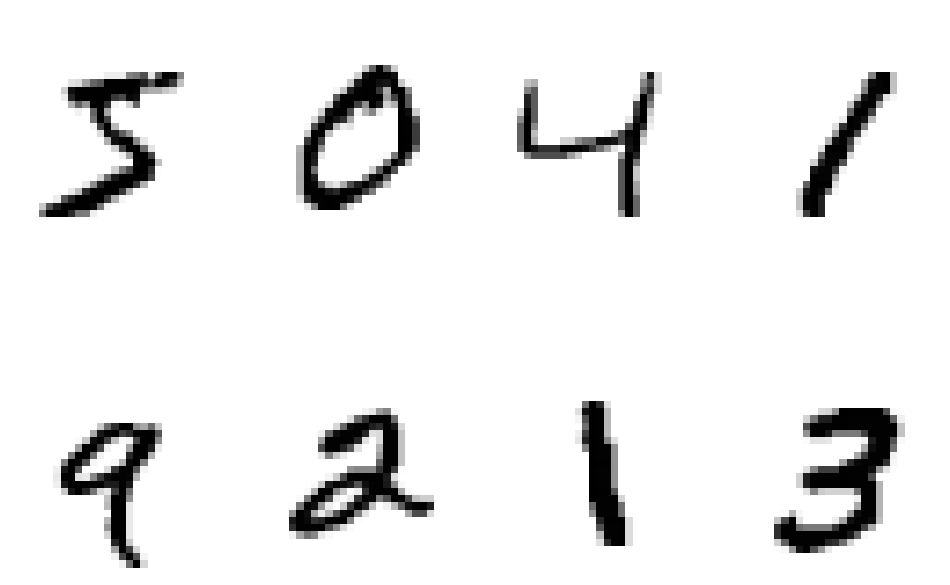

In [5]:
plt.figure(figsize=(12,8))
for i in range(8):
  plt.subplot(240 + i + 1)
  plt.imshow(X_train[i], cmap='gray_r')
  plt.title(y_train[i], color='white', fontsize=17)
  plt.axis('off')
plt.show()

Wypłaszczenie obrazów

In [6]:
X_train = X_train.reshape(-1, 28*28)
X_train.shape

(5000, 784)

Standaryzacja

In [7]:
X_train = X_train/255.

###PCA

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_train_pca.shape

(5000, 148)

Wyjaśniona wariancja

In [9]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3
3,0.054053,0.288051,4
4,0.047376,0.335427,5
...,...,...,...
143,0.000497,0.948219,144
144,0.000491,0.948711,145
145,0.000482,0.949193,146
146,0.000473,0.949665,147


In [10]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout = go.Layout(title='PCA - 148 components', width=950, template='plotly_dark'))
fig.show()

In [11]:
X_train_pca[0].shape

(148,)

Odwrócenie działania metody PCA

X_train[0] miało kształt (784,) → 28×28 pikseli.

Po redukcji PCA, np. do 154 komponentów, X_train_pca[0].shape = (154,).

Po inverse_transform dostajesz z powrotem coś o kształcie (784,) (czyli zrekonstruowany obrazek w przestrzeni oryginalnych pikseli).

To nie jest identyczny obrazek – tylko przybliżenie oryginału, bo PCA odrzuca mniej istotne komponenty.

In [12]:
approx = pca.inverse_transform(X_train_pca)
approx[0].shape

(784,)

Wizualizacja

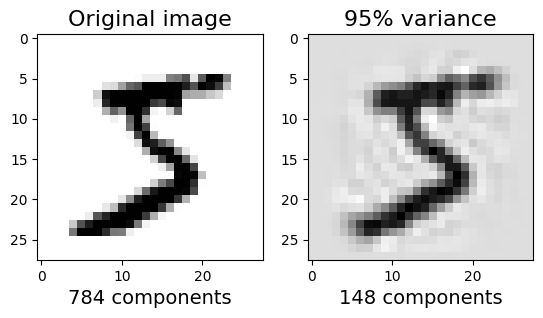

In [18]:

plt.subplot(121)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray_r', interpolation='nearest')
plt.xlabel('784 components', color='black', fontsize=14)
plt.title('Original image', color='black', fontsize=16)

plt.subplot(122)
plt.imshow(approx[0].reshape(28, 28), cmap='gray_r', interpolation='nearest')
plt.xlabel(f'{pca.n_components_} components', color='black', fontsize=14)
plt.title('95% variance', color='black', fontsize=16)
plt.show()


###Porównanie procentu wyjaśnionej wariancji

In [20]:
def make_pca(n_components, data, idx=0):

  pca = PCA(n_components=n_components)
  data_pca = pca.fit_transform(data)

  # stworzenie i wizualizacja aproksymacji
  approx = pca.inverse_transform(data_pca)

  plt.imshow(approx[idx].reshape(28,28), cmap='gray_r', interpolation='nearest')
  plt.xlabel(f'{pca.n_components_} components', color='black', fontsize=12)
  plt.title(f'{str(n_components)}% var', color='black', fontsize=15)

enumerate zamienia listę w pary (indeks, wartość), a Ty rozpakowujesz je do zmiennych i i val.

Wizualizacja: 5

ValueError: num must be an integer with 1 <= num <= 8, not 9

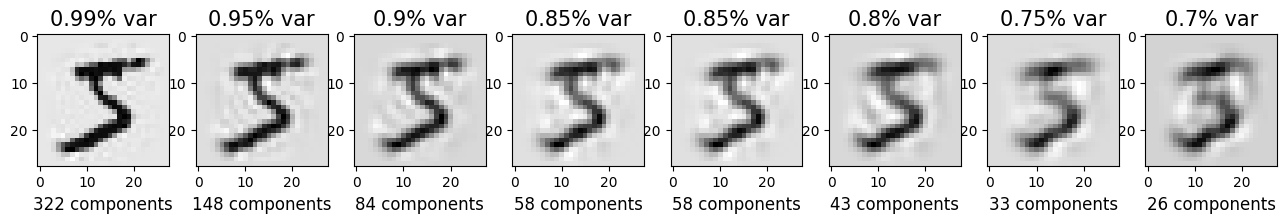

In [28]:
plt.figure(figsize=(16,10))
for i, val in enumerate([0.99, 0.95, 0.90, 0.85, 0.85, 0.8, 0.75, 0.7, 0.5]):
  plt.subplot(180+i+1)
  make_pca(val, X_train)
plt.show()

Wizualizacja 0:

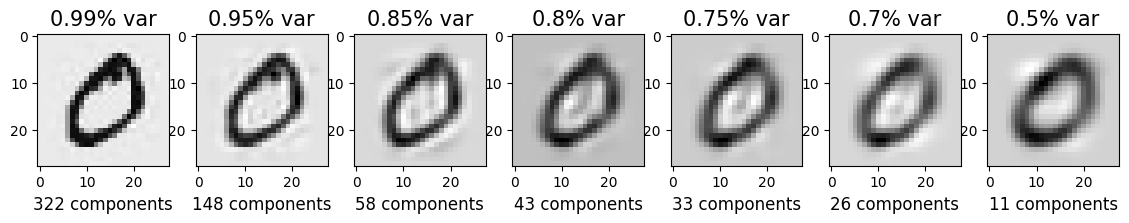

In [30]:
plt.figure(figsize=(16,10))
for i,val in enumerate([0.99,0.95,0.85,0.8,0.75,0.7,0.5]):
  plt.subplot(180+i+1)
  make_pca(val, X_train, idx=1)
plt.show()

In [31]:
Wizualizacja: 9

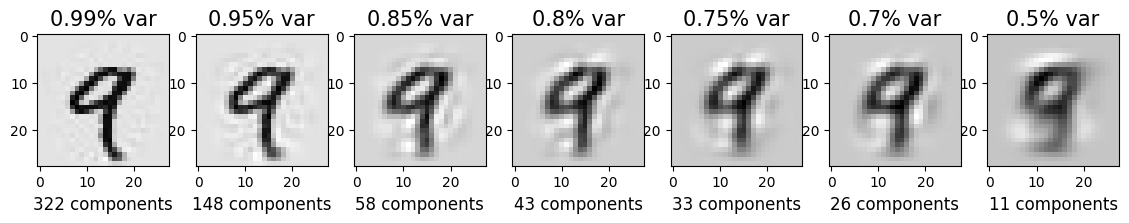

In [32]:
plt.figure(figsize=(16,10))
for i,val in enumerate([0.99,0.95,0.85,0.8,0.75,0.7,0.5]):
  plt.subplot(180+i+1)
  make_pca(val, X_train, idx=4)
plt.show()